In [54]:
from gensim import models, corpora
import pickle
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

import pyLDAvis
import pyLDAvis.gensim_models 

/Users/jeandemeusy/Desktop/antede/venv/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [57]:
def train_lsa(filtered_texts, num_topics = 10):
    dictionary = corpora.Dictionary(filtered_texts)
    corpus = [dictionary.doc2bow(text) for text in filtered_texts]

    # transform the vectors to tf-idf representation
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]

    lsa = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
    corpus_tfidf = lsa[corpus_tfidf]

    return lsa,dictionary,corpus,corpus_tfidf

def get_corpus(filtered_texts):
    dictionary = corpora.Dictionary(filtered_texts)
    corpus = [dictionary.doc2bow(text) for text in filtered_texts]

    return corpus

In [11]:
with open("all_sites_dataframe.p", "rb") as f:
    data_df = pickle.load(f)

id2word = corpora.Dictionary(data_df['filter'])

In [17]:
coherences = []
for n in range(2,50,4):
    print(f"{n=}")
    lsa_model, _, _, _ = train_lsa(data_df['filter'], n)
    coherence_model_lda = CoherenceModel(model=lsa_model, texts=data_df['filter'], dictionary=id2word, coherence='c_v')

    coherences.append(coherence_model_lda.get_coherence())

n=2
n=6
n=10
n=14
n=18
n=22
n=26
n=30
n=34
n=38
n=42
n=46


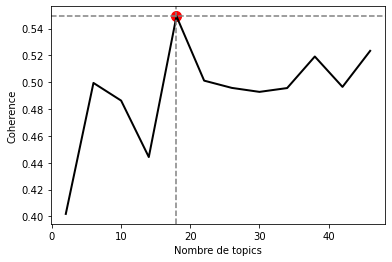

In [52]:
limit=50; start=2; step=4;
arr = np.array(coherences)
x = range(start, limit, step)
plt.plot(x, coherences, "k", linewidth=2)
plt.scatter(x[arr.argmax()], arr.max(), s=100, c = "r" )
plt.axvline(x[arr.argmax()],linestyle="--",color="gray")
plt.axhline(arr.max(),linestyle="--",color="gray")

plt.xlabel("Nombre de topics")
plt.ylabel("Coherence")
# plt.legend(("coherence_values"))
plt.show()

In [58]:
n_opt = 18
lsa_model, _, _, _ = train_lsa(data_df['filter'], n_opt)

corpus = get_corpus(data_df['filter'])


pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lsa_model, corpus, id2word)
pyLDAvis.save_html(vis, 'lda_result.html')

with open("topics.json","w") as f:
    f.write(vis.to_json())

/Users/jeandemeusy/Desktop/antede/venv/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/Users/jeandemeusy/Desktop/antede/venv/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/jeandemeusy/Desktop/antede/venv/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/jeandemeusy/Desktop/antede/venv/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in fa

In [ ]:
import pickle

with open("all_sites_dataframe.p", "wb") as f:
    pickle.dump(data_df,f)